# Deep Learning - Homework 02

### Roberto Corti

In [6]:
from google.colab import drive

folder_mount = '/content/drive' # Your Drive will be mounted on top of this path

drive.mount(folder_mount)

Mounted at /content/drive


In [7]:
%cd drive/MyDrive/Università/DSSC/Secondo\ Anno/Deep-Learning/homeworks

/content/drive/MyDrive/Università/DSSC/Secondo Anno/Deep-Learning/homeworks


In [2]:
import torch
import itertools
import matplotlib.pyplot as plt
import numpy as np

### 1. Read Read the paper [Learning representations by back-propagating errors with learning rule](https://www.nature.com/articles/323533a0.pdf)


### 2. Reconstruct in PyTorch the first experiment in eq.8 (gradient descent without momentum).

The input vector $\bf{X}$ of this MLP model is a binary six-dimensional binary vector (i.e. $\forall i \in \{1, ..., 6\},  X_i \in \{ 0, 1\} )$ and the output $y$ is a scalar binary value that is 1 if and only if we have _mirror symmetry_ in $\bf{X}$ that is 

$$
\begin{pmatrix} x_1 \\ x_2 \\ x_3 \\ x_4 \\ x_5 \\ x_6 \end{pmatrix} = \begin{pmatrix} x_6 \\ x_5 \\ x_4 \\ x_3 \\ x_2 \\ x_1 \end{pmatrix} 
$$


In order to reconstruct the experiment let's create the training data, that is given by all possible $2^6=54$ combination of the input vector $\bf{X}$ provided with their own proper label $y$


In [4]:
X = torch.tensor([list(i) for i in itertools.product([0, 1], repeat=6)], dtype=torch.float32)

y = torch.tensor([1 if (x == x.flip(0)).all().item() else 0 for x in X], dtype=torch.float32)
y = y.reshape(64, 1)

In [5]:
for i in range(0, 64):
  print(f'X{i+1}: {X[i].numpy()}, y{i+1}: {y[i].numpy()}')

X1: [0. 0. 0. 0. 0. 0.], y1: [1.]
X2: [0. 0. 0. 0. 0. 1.], y2: [0.]
X3: [0. 0. 0. 0. 1. 0.], y3: [0.]
X4: [0. 0. 0. 0. 1. 1.], y4: [0.]
X5: [0. 0. 0. 1. 0. 0.], y5: [0.]
X6: [0. 0. 0. 1. 0. 1.], y6: [0.]
X7: [0. 0. 0. 1. 1. 0.], y7: [0.]
X8: [0. 0. 0. 1. 1. 1.], y8: [0.]
X9: [0. 0. 1. 0. 0. 0.], y9: [0.]
X10: [0. 0. 1. 0. 0. 1.], y10: [0.]
X11: [0. 0. 1. 0. 1. 0.], y11: [0.]
X12: [0. 0. 1. 0. 1. 1.], y12: [0.]
X13: [0. 0. 1. 1. 0. 0.], y13: [1.]
X14: [0. 0. 1. 1. 0. 1.], y14: [0.]
X15: [0. 0. 1. 1. 1. 0.], y15: [0.]
X16: [0. 0. 1. 1. 1. 1.], y16: [0.]
X17: [0. 1. 0. 0. 0. 0.], y17: [0.]
X18: [0. 1. 0. 0. 0. 1.], y18: [0.]
X19: [0. 1. 0. 0. 1. 0.], y19: [1.]
X20: [0. 1. 0. 0. 1. 1.], y20: [0.]
X21: [0. 1. 0. 1. 0. 0.], y21: [0.]
X22: [0. 1. 0. 1. 0. 1.], y22: [0.]
X23: [0. 1. 0. 1. 1. 0.], y23: [0.]
X24: [0. 1. 0. 1. 1. 1.], y24: [0.]
X25: [0. 1. 1. 0. 0. 0.], y25: [0.]
X26: [0. 1. 1. 0. 0. 1.], y26: [0.]
X27: [0. 1. 1. 0. 1. 0.], y27: [0.]
X28: [0. 1. 1. 0. 1. 1.], y28: [0.]
X29: [0. 1

Once generated the data, my focus goes on the architecture of the network.

The neural network depicted in Fig.1 has the following structure:

![](img/MLP-hw_2.png)



**Layer 1**:  
* $ z^{(1)} = W^{(1)}  x$,  where $x \in  \mathbb{R}^{6} $ and $W^{(1)} \in \mathbb{R}^{2 \times 5}$
* $ a^{(1)} = h^{(1)}(z^{(1)})$, where $h^{(1)}(x) = sigmoid(x)$


**Layer 2**:  
* $ z^{(2)} = W^{(2)}  a^{(1)}$,  where $a^{(1)} \in \mathbb{R}^{2}$ and $W^{(2)} \in \mathbb{R}^{1 \times 2}$
* $ \hat{y} = h^{(2)}(z^{(2)})$, where $h^{(2)}(x) = sigmoid(x)$




In [8]:
class ANN(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = torch.nn.Linear(in_features=6, out_features=2,  bias=False)
    self.outlayer = torch.nn.Linear(in_features=2, out_features=1,  bias=False)
    
  def forward(self, x):
    out = self.layer1(x)
    out = torch.sigmoid(out)
    out = self.outlayer(out)
    out = torch.sigmoid(out)
    return out

### 3. Train the model

To train the model I have to make several decisions related to weight initialization, loss function, optimizer, learning rate and number of epochs. In order to be consistent with what is written in the paper I make the following choices:

* All weights of the network are initialized from an Uniform distribution in the interval [-0.3, 0.3].


* The loss function is the Mean Square Error  $ L \propto (y-\hat{y})^2$


* As requested, the optimizer is the one specified in Eq.(8), that is the Gradient Descent without momentum. It updates weights in the following way: 
$$ w^{epoch+1} = w^{epoch} - \epsilon \nabla_w L $$
The learning rate $\epsilon$ it has been fixed at 0.1.


* The number of epochs chosen is 1000

epoch 1 / 1000, loss = 0.2538
epoch 101 / 1000, loss = 0.1537
epoch 201 / 1000, loss = 0.1232
epoch 301 / 1000, loss = 0.1145
epoch 401 / 1000, loss = 0.1116
epoch 501 / 1000, loss = 0.1104
epoch 601 / 1000, loss = 0.1098
epoch 701 / 1000, loss = 0.1096
epoch 801 / 1000, loss = 0.1094
epoch 901 / 1000, loss = 0.1094




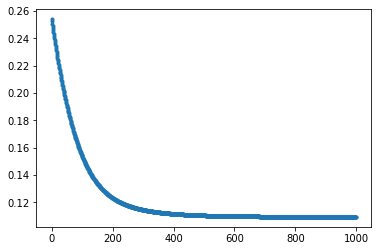

In [12]:
# model
model = ANN()

for w in model.parameters():
    torch.nn.init.uniform_(w, a=-0.3, b=0.3)

# loss and optimizer
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

# training loop
num_epochs = 1000

# losses
losses  = []

for epoch in range(num_epochs):

    # forward pass
    y_hat = model.forward(X)
    loss = criterion(y_hat, y)
    losses.append(loss.item())
    # backward 
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    # print
    if epoch % 100 == 0:
      print(f'epoch {epoch+1} / {num_epochs}, loss = {loss.item():.4f}')


print('\n')
plt.plot(np.arange(num_epochs), losses, '.-')
plt.show()

After  ~600 epochs we observe that the Loss function is not able to decrease its value anymore.

Is the trained network now able to see the symmetric examples ?

In [39]:
with torch.no_grad():
  mask = (y==1.0).flatten().tolist()
  X_symm = X[mask]
  y_symm = y[mask]


  y_hat = torch.tensor([1.0 if model(x)>0.5 else 0.0 for x in X_symm]).reshape(sum(mask), 1)

  print(f'Misclassified symmetric examples: {sum(y_hat!=y_symm).item()}')

Misclassified symmetric examples: 8


### 4. Inspect the weights you obtained

I try to inspect the obtained weights of the model by using the `named_parameters` function of `model`

In [43]:
with torch.no_grad():
  for name, param in model.named_parameters():
      print(name, "\t", param)

layer1.weight 	 Parameter containing:
tensor([[ 0.0932, -0.0354,  0.1864,  0.4109,  0.2065,  0.0240],
        [ 0.2337,  0.3363,  0.3428,  0.1227,  0.2999,  0.1735]],
       requires_grad=True)
outlayer.weight 	 Parameter containing:
tensor([[-1.2731, -1.6816]], requires_grad=True)


As suggested in the paper, the learned parameters should respect symmetrical properties.

In this case we have no such symmetry in the layer's weights and that could explain the fact that our trained network with this set-up is not able to detect symmetry in the input.